# **Applied Natural Language Processing**
# **AT2**

## **HD Innovators**

1. Setting up the initial environment
2. Exploring the dataset
3. Data preparation
4. Analysing text using VADER sentiment analysis
5. Analysing text using Transformers RoBERTa base model (~58M tweets)
6. Analysing text using the latest Transformers RoBERTa latest model (~124M tweets)
7. Evaluation
8. Best model for user

## **1. Setting up the initial environment**

In [1]:
import pandas as pd
import seaborn as sns
import nltk
import re
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/mcyaputra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mcyaputra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **2. Exploring the dataset**

**2.1 Loading and exploring dataset**

In [7]:
#Loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/EmmaNguyen99/ANLP_AT2_HDInnovators/main/lyrics_all_combined.csv')

In [9]:
#Showing the first 10 rows of the dataset
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence
0,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791
1,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930
2,15045,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561
3,15691,carl sims,it's just a party,2004,blues,girls knock ghetto ballin real thugs unngghhhh...,198,0.705276
4,16322,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690


In [10]:
#Dropping irrelevant column
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [11]:
#Showing total rows and columns in the dataset
df.shape

(11978, 7)

In [12]:
#Showing total values for each genre
df['genre'].value_counts()

blues      2000
country    2000
jazz       2000
pop        2000
rock       2000
reggae     1978
Name: genre, dtype: int64

In [41]:
#Displaying additional information including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11978 entries, 0 to 11977
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist_name   11978 non-null  object 
 1   track_name    11978 non-null  object 
 2   release_date  11978 non-null  int64  
 3   genre         11978 non-null  object 
 4   lyrics        11978 non-null  object 
 5   len           11978 non-null  int64  
 6   valence       11978 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 655.2+ KB


In [42]:
#Displaying statistical figures
df.describe()

,release_date,len,valence
count,11978.000000,11978.000000,11978.000000
mean,1994.581232,106.949324,0.568380
std,17.132621,37.214055,0.245457
min,1950.000000,56.000000,0.000000
25%,1982.000000,76.000000,0.375515
50%,1996.000000,98.000000,0.586768
75%,2010.000000,130.000000,0.767879
max,2019.000000,199.000000,1.000000


**2.2 Checking for missing values**

In [43]:
df['lyrics'].duplicated().sum()

0

**2.3 WordCloud**

<function matplotlib.pyplot.show(close=None, block=None)>

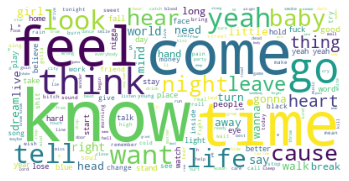

In [44]:
#Converting text to string
sentence_df = df['lyrics'].to_string()

#Showing most frequent words using word cloud
word_cloud = WordCloud(background_color = 'white').generate(sentence_df)
plt.imshow(word_cloud)
plt.axis('off')
plt.show

**2.4 Top 20 most frequent words**

In [45]:
#Import Counter library
from collections import Counter

#Calculating 10 most common words
Counter(" ".join(df["lyrics"]).split()).most_common(20)

[('like', 19887),
 ('know', 18872),
 ('time', 15167),
 ('come', 13897),
 ('yeah', 12222),
 ('feel', 9688),
 ('go', 9599),
 ('life', 9362),
 ('cause', 9207),
 ('away', 9002),
 ('want', 8243),
 ('right', 8118),
 ('baby', 8092),
 ('live', 7604),
 ('heart', 7460),
 ('night', 7007),
 ('tell', 6956),
 ('gonna', 6856),
 ('leave', 6691),
 ('good', 6668)]

## **3. Data Preparation**

**3.1 Converting text to lowercase**

In [46]:
#Defining a function to lowercase text
def lowercase(text):
  #Make text lowercase
  text = text.lower()
  return text

#Applying the lowercase function to the text
df['lyrics'] = df['lyrics'].apply(lowercase)

Texts are converted to lowercase to maintain consistency

**3.2 Removing punctuation**

In [48]:
#Defining a function to remove punctuation
def remove_punctuation(text):
  no_punctuation = str.maketrans('', '', string.punctuation)
  new_text = text.translate(no_punctuation)
  return new_text

#Applying punctuation removal function to the text
df['lyrics'] = df['lyrics'].apply(remove_punctuation)

This function removes punctuations from the text to reduce noise. Standardizing the format of the texts is crucial to make sure the analysis or model is being fed or trained on a consistent set of data

**3.3 Removing stopwords**

In [49]:
#Importing stopwords from nltk library
nltk.download('stopwords')

#Defining a function to remove stopwords
def remove_stop(text):

  #Splitting text
  new_text = text.split()
  stop_words = nltk.corpus.stopwords.words('english')

  #Looping through the text
  filtered_text = [word for word in new_text if not word in stop_words]

  #Rejoin text
  sentence_filtered = ' '.join(filtered_text)
  
  return sentence_filtered

#Applying stop words removal function
df['lyrics'] = df['lyrics'].apply(remove_stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mcyaputra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Some common stop words include 'a', 'and' and 'the'. Removing these words can help reduce the size and dimensionality and improve overall efficiency of machine learning models.

**3.4 Tokenize and lemmatize text**

In [50]:
#Importing relevant library
from nltk.stem import WordNetLemmatizer

#Assigning a function for easier recall
lemmatizer = WordNetLemmatizer()

#Defining a function to perform lemmatization
def lemmatize(text):

  #Tokening words
  words = nltk.word_tokenize(text)

  #Performing lemmatization
  lemma_words = [lemmatizer.lemmatize(word) for word in words]

  #Rejoining the text
  lemma_text = ' '.join(lemma_words)

  return lemma_text

#Applying lemmatization function to the text
df['lyrics'] = df['lyrics'].apply(lemmatize)
df

,artist_name,track_name,release_date,genre,lyrics,len,valence
0,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791
1,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930
2,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561
3,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276
4,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690
...,...,...,...,...,...,...,...
11973,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701
11974,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401
11975,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397
11976,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556


We can further improve the accuracy of the analysis using lemmatization technique. This process reduces words to their root or base form called lemma. This is a common technique used in sentiment analysis to normalize words and reduce variations

**3.5 Assigning sentiment tag (positive/negative/neutral) to the dataset**

In [ ]:
#Assigning rating values to variables
value1 = 1/3
value2 = 2/3

#Defining a function to organize values to into sentiment ratings
def sentiment_value(valence):
    if valence >= value2:
        return 'Positive'
    elif valence <= value1:
        return 'Negative'
    else: 
        return 'Neutral'
    
#Applying the function to valence column    
df['original_sentiment'] = df['valence'].apply(sentiment_value)
df

**3.6 Distribution of sentiment rating in 'original_sentiment'**

In [ ]:
#Showing the distribution of sentiment rating
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='original_sentiment', palette='dark:#5A9', hue='original_sentiment')
plt.xlabel(xlabel='Sentiment')
plt.title(label='Sentiment Distribution')

## **4. Analysing text using VADER sentiment analysis**

**4.1 Importing VADER sentiment analyzer**

In [53]:
#Installing vaderSentiment
!pip install vaderSentiment


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [54]:
#Importing relevant library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

#Assigning SentimentIntensityAnalyzer to a function called analyzer
vader_analyzer = SentimentIntensityAnalyzer()

**4.2 Performing sentiment analysis using VADER**

In [55]:
#Making a copy of the dataset
df_vader = df.copy()

#Creating an empty dictionary
vader_sentiment = {}

#Performing sentiment analysis by iterrating through every rows in the dataset
for index, row in df_vader.iterrows():
    text = row['lyrics']
    Id = index

    #Analysing text and saving the result in the empty dictionary created earlier
    vader_sentiment[Id] = vader_analyzer.polarity_scores(text)

**4.3 Merging analysis result with the original dataset**

In [56]:
#Converting result dictionary to a pandas dataframe
vader_sentiment = pd.DataFrame(vader_sentiment).T

#Merging both dataset (vader sentiment result + original dataset)
vader_sentiment = pd.concat([vader_sentiment, df_vader], axis=1)

#Renaming columns to indicate sentiment result using VADER
df_vader = vader_sentiment.rename(columns={'neg': 'Negative', 'neu': 'Neutral', 'pos': 'Positive', 'compound': 'Compound'})

**4.4 Assigning sentiment rating for every lyrics**

In [57]:
#Creating an empty list
vader_sentiment_rating = []

#Get the sentiment with the highest score
for index, row in df_vader[['Negative', 'Neutral', 'Positive']].iterrows():
    max_value = row.idxmax()
    Id = index
    vader_sentiment_rating.append({'vader_sentiment': max_value})

In [58]:
#Converting result to a pandas dataframe
vader_sentiment_rating = pd.DataFrame(vader_sentiment_rating)

#Merging both dataset (vader sentiment rating + original dataset)
df_vader = pd.concat([vader_sentiment_rating, df_vader], axis=1)

#Showing dataset
df_vader

,vader_sentiment,Negative,Neutral,Positive,Compound,artist_name,track_name,release_date,genre,lyrics,len,valence,original_sentiment
0,Neutral,0.087,0.756,0.158,0.9153,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,Positive
1,Neutral,0.122,0.516,0.362,0.9963,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,Positive
2,Neutral,0.103,0.668,0.229,0.9723,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561,Neutral
3,Neutral,0.191,0.727,0.082,-0.9838,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276,Positive
4,Neutral,0.058,0.891,0.051,-0.3612,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,Negative,0.500,0.411,0.089,-0.9922,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701,Neutral
11974,Neutral,0.276,0.559,0.165,-0.8074,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401,Negative
11975,Positive,0.082,0.366,0.552,0.9896,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397,Negative
11976,Neutral,0.027,0.874,0.100,0.4019,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556,Negative


**4.5 Top 20 most frequent words**

Text(0.5, 1.0, 'Top 20 most frequent words')

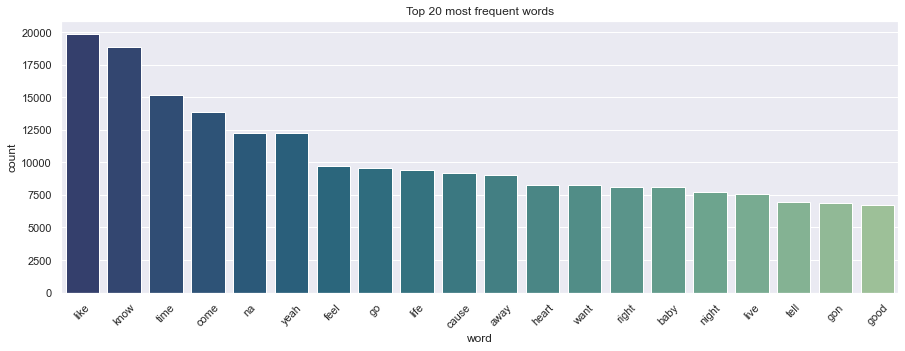

In [199]:
#Importing relevant library
from collections import Counter

#Calculating 20 most common words
word_count = Counter(" ".join(df_vader["lyrics"]).split()).most_common(20)

word_count = pd.DataFrame(word_count, columns=['word', 'count'])

#Visualizing using seaborn barplot
plt.figure(figsize=(15,5))
sns.barplot(data=word_count, x='word', y='count', palette='crest_r')
plt.xticks(rotation=45)
plt.title(label= 'Top 20 most frequent words')

## **5. Analysing text using Transformers RoBERTa base model (~58M tweets)**

**5.1 Installing and Importing Transformers library**

In [60]:
#Installing required library
!pip install torch torchvision
!pip install transformers


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [61]:
#PyTorch is needed to run Transformers, run below code if you don't have PyTorch installed
# !pip install torch torchvision

#Importing functions from transformers library
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

**5.2 Pulling pre-trained RoBERTa model and assign it to a function**

In [62]:
#Pulling trained model (RoBERTa) and assigning it to a function
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

**5.3 Performing sentiment analysis using RoBERTa**

In [63]:
#Defining a function to initiate RoBERTa and perform sentiment analysis
def roberta_scores(text):
    encoded_text = tokenizer(text, max_length= 511, return_tensors='pt')
    output = model(**encoded_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    score_dict = {
        'Negative': score[0],
        'Neutral': score[1],
        'Positive': score[2]
    }
    return score_dict

In [64]:
#Making a copy of the dataset
df_roberta_base = df.copy()

#Creating empty dictionary
roberta_result = {}

#Performing sentiment analysis by iterrating through every rows in the dataset
for index, row in tqdm(df_roberta_base.iterrows(), total=len(df_roberta_base)):
    text = row['lyrics']
    Id = index

    #Analysing text and saving the result in the empty dictionary created earlier
    roberta_result[Id] = roberta_scores(text)


  0%|          | 0/11978 [00:00<?, ?it/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


**5.4 Merging analysis result with the original dataset**

In [70]:
#Converting result dictionary to a pandas dataframe
roberta_result = pd.DataFrame(roberta_result).T

#Merging both dataset (roberta sentiment result + original dataset)
df_roberta_base = pd.concat([roberta_result, df_roberta_base], axis=1)

#Showing dataset
df_roberta_base

,Negative,Neutral,Positive,artist_name,track_name,release_date,genre,lyrics,len,valence,original_sentiment
0,0.220962,0.683247,0.095791,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,Positive
1,0.096997,0.766427,0.136576,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,Positive
2,0.386505,0.557754,0.055742,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561,Neutral
3,0.451228,0.507474,0.041298,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276,Positive
4,0.116273,0.841189,0.042538,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
11973,0.683536,0.291190,0.025273,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701,Neutral
11974,0.288800,0.614660,0.096540,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401,Negative
11975,0.071747,0.724487,0.203767,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397,Negative
11976,0.286323,0.654840,0.058837,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556,Negative


**5.5 Assigning sentiment rating for every lyrics**

In [71]:
#Creating an empty list
roberta_sentiment_base = []

#Get the sentiment with the highest score
for index, row in df_roberta_base[['Negative', 'Neutral', 'Positive']].iterrows():
    max_value = row.idxmax()
    roberta_sentiment_base.append({'roberta_sentiment_base': max_value})

    

In [72]:
#Converting result to a pandas dataframe
roberta_sentiment_base = pd.DataFrame(roberta_sentiment_base)

#Merging both dataset (vader sentiment rating + original dataset)
df_roberta_base = pd.concat([roberta_sentiment_base, df_roberta_base], axis=1)

#Showing dataset
df_roberta_base

,roberta_sentiment_base,Negative,Neutral,Positive,artist_name,track_name,release_date,genre,lyrics,len,valence,original_sentiment
0,Neutral,0.220962,0.683247,0.095791,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,Positive
1,Neutral,0.096997,0.766427,0.136576,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,Positive
2,Neutral,0.386505,0.557754,0.055742,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561,Neutral
3,Neutral,0.451228,0.507474,0.041298,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276,Positive
4,Neutral,0.116273,0.841189,0.042538,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
11973,Negative,0.683536,0.291190,0.025273,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701,Neutral
11974,Neutral,0.288800,0.614660,0.096540,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401,Negative
11975,Neutral,0.071747,0.724487,0.203767,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397,Negative
11976,Neutral,0.286323,0.654840,0.058837,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556,Negative


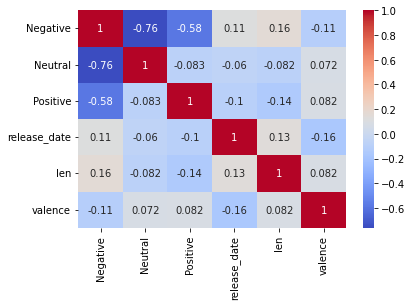

In [73]:
ax = sns.heatmap(df_roberta_base.corr(), annot =True, fmt='.2g', cmap = 'coolwarm')
plt.show()

## **6. Analysing text using the latest Transformers RoBERTa latest model (~124M tweets)**

**6.1 Installing and Importing Transformers library**

In [74]:
#Importing functions from transformers library
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

**6.2 Pulling pre-trained RoBERTa model and assign it to a function**

In [75]:
#Pulling trained model (RoBERTa) and assigning it to a function
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


**6.3 Performing sentiment analysis using RoBERTa**

In [107]:
#Defining a function to initiate RoBERTa and perform sentiment analysis
def roberta_latest_scores(text):
    encoded_text = tokenizer(text, max_length= 511, return_tensors='pt')
    output = model(**encoded_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    score_dict = {
        'Negative': score[0],
        'Neutral': score[1],
        'Positive': score[2]
    }
    return score_dict

In [108]:
#Making a copy of the dataset
df_roberta_latest = df.copy()

#Creating empty dictionary
roberta_latest_result = {}

#Performing sentiment analysis by iterrating through every rows in the dataset
for index, row in tqdm(df_roberta_latest.iterrows(), total=len(df_roberta_latest)):
    text = row['lyrics']
    Id = index

    #Analysing text and saving the result in the empty dictionary created earlier
    roberta_latest_result[Id] = roberta_latest_scores(text)

  0%|          | 0/11978 [00:00<?, ?it/s]

**6.4 Merging analysis result with the original dataset**

In [109]:
#Converting result dictionary to a pandas dataframe
roberta_latest_result = pd.DataFrame(roberta_latest_result).T

#Merging both dataset (roberta sentiment result + original dataset)
df_roberta_latest = pd.concat([roberta_latest_result, df_roberta_latest], axis=1)

#Showing dataset
df_roberta_latest


,Negative,Neutral,Positive,artist_name,track_name,release_date,genre,lyrics,len,valence,original_sentiment
0,0.030405,0.657197,0.312398,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,Positive
1,0.031855,0.404066,0.564079,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,Positive
2,0.231962,0.642463,0.125575,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561,Positive
3,0.530861,0.396479,0.072660,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276,Positive
4,0.054678,0.764214,0.181107,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690,Positive
...,...,...,...,...,...,...,...,...,...,...,...
11973,0.742722,0.230746,0.026532,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701,Positive
11974,0.229094,0.719133,0.051774,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401,Negative
11975,0.018533,0.684240,0.297227,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397,Negative
11976,0.159167,0.693238,0.147595,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556,Negative


**6.5 Assigning sentiment rating for every lyrics**

In [110]:
#Creating an empty list
roberta_sentiment_latest = []

#Get the sentiment with the highest score
for index, row in df_roberta_latest[['Negative', 'Neutral', 'Positive']].iterrows():
    max_value = row.idxmax()
    roberta_sentiment_latest.append({'roberta_sentiment_latest': max_value})


In [111]:
#Converting result to a pandas dataframe
roberta_sentiment_latest = pd.DataFrame(roberta_sentiment_latest)

#Merging both dataset (vader sentiment rating + original dataset)
df_roberta_latest = pd.concat([roberta_sentiment_latest, df_roberta_latest], axis=1)

#Showing dataset
df_roberta_latest

,roberta_sentiment_latest,Negative,Neutral,Positive,artist_name,track_name,release_date,genre,lyrics,len,valence,original_sentiment
0,Neutral,0.030405,0.657197,0.312398,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,Positive
1,Positive,0.031855,0.404066,0.564079,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,Positive
2,Neutral,0.231962,0.642463,0.125575,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561,Positive
3,Negative,0.530861,0.396479,0.072660,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276,Positive
4,Neutral,0.054678,0.764214,0.181107,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
11973,Negative,0.742722,0.230746,0.026532,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701,Positive
11974,Neutral,0.229094,0.719133,0.051774,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401,Negative
11975,Neutral,0.018533,0.684240,0.297227,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397,Negative
11976,Neutral,0.159167,0.693238,0.147595,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556,Negative


## **7. Assessment**

**7.1 Sentiment rating distributions for each model**

Text(0.5, 1.0, 'roBERTa latest Sentiment Distribution')

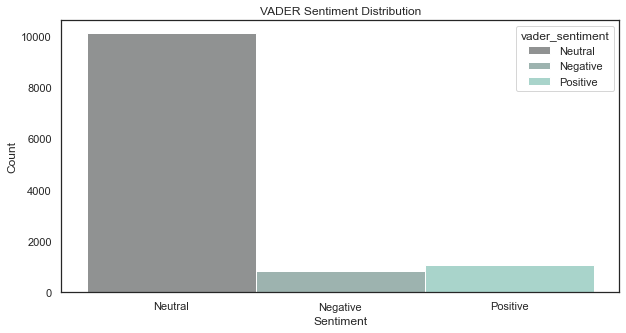

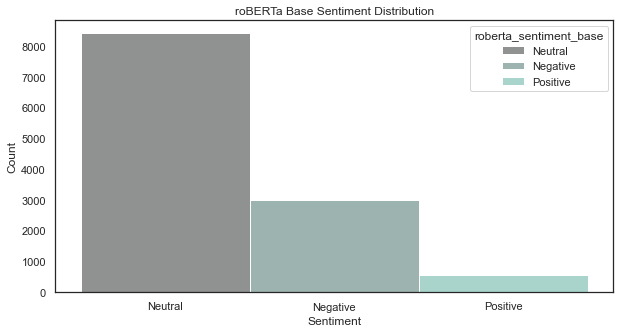

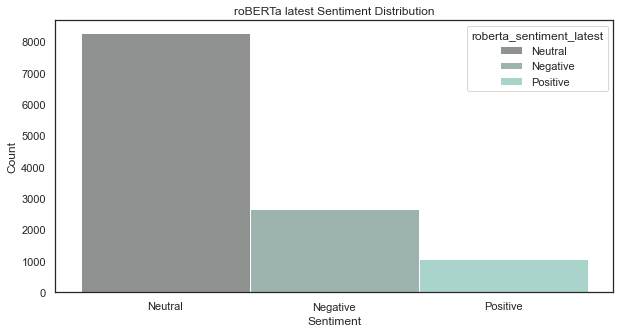

In [220]:
#Showing the distribution of sentiment rating (VADER)
df_vader['vader_sentiment'] = pd.Categorical(df_vader['vader_sentiment'], ['Neutral','Negative','Positive'])
plt.figure(figsize=(10,5))
sns.histplot(data=df_vader, x='vader_sentiment', palette='dark:#5A9', hue='vader_sentiment')
plt.xlabel(xlabel='Sentiment')
plt.title(label='VADER Sentiment Distribution')

#Showing the distribution of sentiment rating (roBERTa_base)
plt.figure(figsize=(10,5))
sns.histplot(data=df_roberta_base, x='roberta_sentiment_base', palette='dark:#5A9', hue='roberta_sentiment_base')
plt.xlabel(xlabel='Sentiment')
plt.title(label='roBERTa Base Sentiment Distribution')

#Showing the distribution of sentiment rating (roBERTa_latest)
df_roberta_latest['roberta_sentiment_latest'] = pd.Categorical(df_roberta_latest['roberta_sentiment_latest'], ['Neutral','Negative','Positive'])
plt.figure(figsize=(10,5))
sns.histplot(data=df_roberta_latest, x='roberta_sentiment_latest', palette='dark:#5A9', hue='roberta_sentiment_latest')
plt.xlabel(xlabel='Sentiment')
plt.title(label='roBERTa latest Sentiment Distribution')

**7.2 Accuracy scores when comparing VADER & roBERTa against original valence score**

In [113]:
#Importing accuracy, precision, recall and f1 scores from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [122]:
#Assigning sentiment ratings from each models to respective variables
y_pred_vader = df_vader['vader_sentiment']
y_pred_roberta_base = df_roberta_base['roberta_sentiment_base']
y_pred_roberta_latest = df_roberta_latest['roberta_sentiment_latest']

**7.3 Accuracy scores when comparing VADER against roBERTa**

In [118]:
#VADER vs roBERTa base
print(accuracy_score(y_pred_roberta_base, y_pred_vader))
print(precision_score(y_pred_roberta_base, y_pred_vader, average='weighted'))
print(recall_score(y_pred_roberta_base, y_pred_vader, average='weighted'))
print(f1_score(y_pred_roberta_base, y_pred_vader, average='weighted'))

0.682584738687594
0.6931170505966358
0.682584738687594
0.6466838997203233


In [120]:
#VADER vs roBERTa base
print(accuracy_score(y_pred_roberta_latest, y_pred_vader))
print(precision_score(y_pred_roberta_latest, y_pred_vader, average='weighted'))
print(recall_score(y_pred_roberta_latest, y_pred_vader, average='weighted'))
print(f1_score(y_pred_roberta_latest, y_pred_vader, average='weighted'))

0.682584738687594
0.6703323561517227
0.682584738687594
0.6442130568058524


## **8. Result**

**For sentiment analysis, we will be using roBERTa latest model (~ trained with 124M tweets)**

**8.1 Sentiment rating distribution**

Text(0.5, 1.0, 'roBERTa latest Sentiment Distribution')

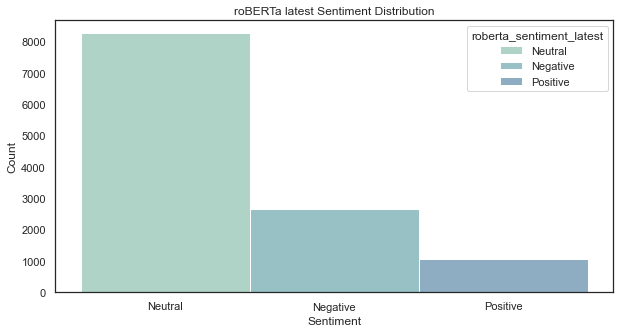

In [222]:
#Showing the distribution of sentiment rating
roberta_sentiment_latest['roberta_sentiment_latest'] = pd.Categorical(roberta_sentiment_latest['roberta_sentiment_latest'], ['Neutral','Negative','Positive'])
plt.figure(figsize=(10,5))
sns.histplot(data=df_roberta_latest, x='roberta_sentiment_latest', palette='crest', hue='roberta_sentiment_latest')
sns.set_theme(style='white')
plt.xlabel(xlabel='Sentiment')
plt.title(label='roBERTa latest Sentiment Distribution')

**8.2 Genre distribution**

Text(0.5, 1.0, 'Genre Distribution')

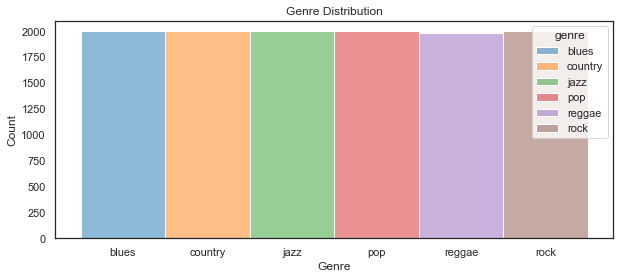

In [229]:
#Showing the distribution of genre
plt.figure(figsize=(10,4))
sns.histplot(data=df_roberta_latest, palette='tab10', x='genre', hue='genre')
sns.set_theme(style='white')
plt.xlabel(xlabel='Genre')
plt.title(label='Genre Distribution')

**8.3 Sentiment distribution per genre**

Text(0.5, 1.0, 'Sentiment Distribution')

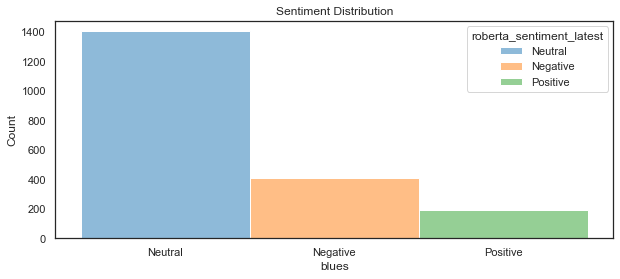

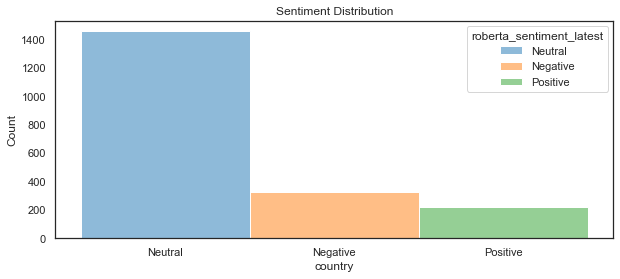

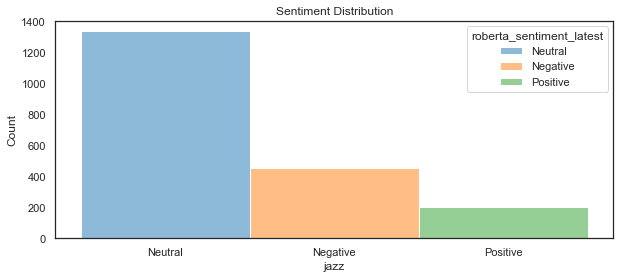

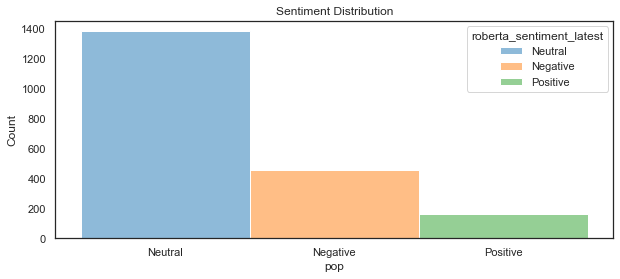

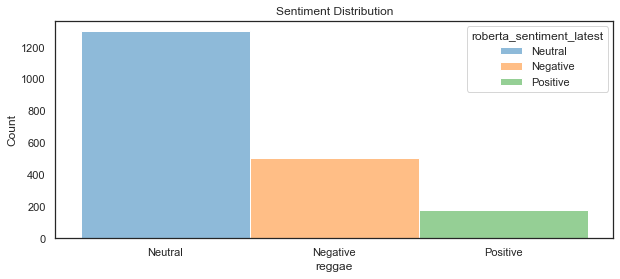

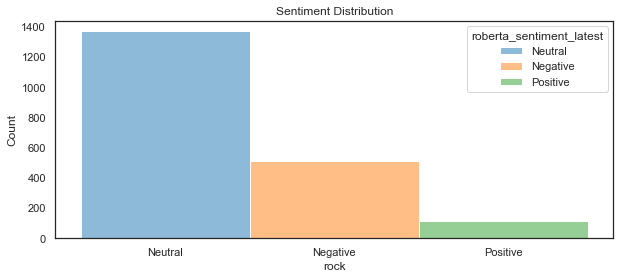

In [280]:
#Blues genre sentiment distribution
blues_genre = df_roberta_latest.loc[df_roberta_latest['genre'] == 'blues']
plt.figure(figsize=(10,4))
sns.histplot(data=blues_genre, palette='tab10', x='roberta_sentiment_latest', hue='roberta_sentiment_latest')
sns.set_theme(style='white')
plt.xlabel(xlabel='blues')
plt.title(label='Sentiment Distribution')

#Country genre sentiment distribution
country_genre = df_roberta_latest.loc[df_roberta_latest['genre'] == 'country']
plt.figure(figsize=(10,4))
sns.histplot(data=country_genre, palette='tab10', x='roberta_sentiment_latest', hue='roberta_sentiment_latest')
sns.set_theme(style='white')
plt.xlabel(xlabel='country')
plt.title(label='Sentiment Distribution')

#Jazz genre sentiment distribution
jazz_genre = df_roberta_latest.loc[df_roberta_latest['genre'] == 'jazz']
plt.figure(figsize=(10,4))
sns.histplot(data=jazz_genre, palette='tab10', x='roberta_sentiment_latest', hue='roberta_sentiment_latest')
sns.set_theme(style='white')
plt.xlabel(xlabel='jazz')
plt.title(label='Sentiment Distribution')

#Pop genre sentiment distribution
pop_genre = df_roberta_latest.loc[df_roberta_latest['genre'] == 'pop']
plt.figure(figsize=(10,4))
sns.histplot(data=pop_genre, palette='tab10', x='roberta_sentiment_latest', hue='roberta_sentiment_latest')
sns.set_theme(style='white')
plt.xlabel(xlabel='pop')
plt.title(label='Sentiment Distribution')

#Reggae genre sentiment distribution
reggae_genre = df_roberta_latest.loc[df_roberta_latest['genre'] == 'reggae']
plt.figure(figsize=(10,4))
sns.histplot(data=reggae_genre, palette='tab10', x='roberta_sentiment_latest', hue='roberta_sentiment_latest')
sns.set_theme(style='white')
plt.xlabel(xlabel='reggae')
plt.title(label='Sentiment Distribution')

#Rock genre sentiment distribution
rock_genre = df_roberta_latest.loc[df_roberta_latest['genre'] == 'rock']
plt.figure(figsize=(10,4))
sns.histplot(data=rock_genre, palette='tab10', x='roberta_sentiment_latest', hue='roberta_sentiment_latest')
sns.set_theme(style='white')
plt.xlabel(xlabel='rock')
plt.title(label='Sentiment Distribution')

In [ ]:
# Use visualization to explore the result of the sentiment analysis and performance metric
# Compare Valence vs Vader vs Roberta48 vs Roberta 126
# Compare result per genre